In [16]:
def fmt_items(lines,max_lines=0):
    max_width=max([len(line)for line in lines])
    empty =' '*max_width
    lines = [line.ljust(max_width)for line in lines]
    lines += [empty]*(max_lines - len(lines))
    return lines
def pp (*list):
    lines = [ str(item).split('\n') for item in list]
    max_lines=max([len(item)for  item in lines])
    lines = [fmt_items(item,max_lines=max_lines)for item in lines]
    lines_t= np.array(lines).T
    print('\n'.join([' '.join(line) for  line in lines_t]))

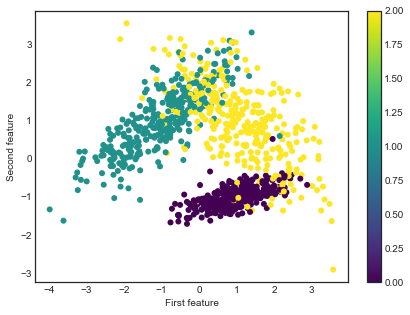

In [21]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Show plots inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,5)

# Generate toy dataset for classification
# X is a matrix of n_samples x n_features and represents the input features
# y is a vector with length n_samples and represents our target
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           random_state=43, n_clusters_per_class=1,
                           n_classes=3)

# Visualize generated dataset
plt.style.use('seaborn-white') # change default style of plot
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis',linewidths = 0)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.colorbar()

In [160]:
n_saples = X.shape[0]

n_features = X.shape[1]
n_classes = len(np.unique(y))
std = 1e-3 # standard deviation of the normal distribution
W = np.random.normal(loc = 0.0, scale = std,size=(n_features, n_classes))

b = np.zeros(n_classes)
scores = np.dot(X,W)+b
pp('scores',X[2,:],'*',W,'=',scores[2,:])
exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
pp('exp_scores','exp(',scores[2,:],'-',np.max(scores[2,:]),')','=',exp_scores[2,:])
probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
pp('probs',exp_scores[2,:],'/',np.sum(exp_scores[2,:]),'=',probs[2,:])
correct_logprobs = -np.log(probs[np.arange(n_saples), y])
loss = np.sum(correct_logprobs)/n_saples

# Add regularization using the L2 norm
# reg is a hyperparameter and controls the strength of regularization
reg = 0.5
reg_loss = 0.5*reg*np.sum(W*W)
loss += reg_loss

scores [0.25853729 1.34764803] * [[-1.07737626e-03 -8.63463780e-04  2.29269246e-04]  = [ 0.00068974 -0.00020748 -0.00038395]
                                  [ 7.18499815e-04  1.16937346e-05 -3.28889899e-04]]                                        
exp_scores exp( [ 0.00068974 -0.00020748 -0.00038395] - 0.0006897429242114819 ) = [1.         0.99910318 0.99892688]
probs [1.         0.99910318 0.99892688] / 2.9980300610179667 = [0.33355236 0.33325322 0.33319442]


In [168]:
pp(0.5*0.5*np.sum(W*W),loss,loss + reg_loss)

6.458552436873726e-07 1.0987730554826287 1.0987737013378724


In [151]:
- np.log(probs[5,2])

1.0976270470640834

In [70]:
pp(X.shape,W.shape)

(1000, 2) (2, 3)


In [69]:
pp(np.dot(X,W).shape , (np.dot(X,W)+b).shape)

(1000, 3) (1000, 3)


In [110]:
x = np.random.randint(0,10,12).reshape(4,3)
print(x)
print(np.sum(x,axis=1,keepdims=True))

[[8 5 6]
 [3 3 1]
 [8 8 6]
 [9 2 4]]
[[19]
 [ 7]
 [22]
 [15]]


In [88]:
print(scores[:,0].shape)

(1000,)


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


AxisError: axis 2 is out of bounds for array of dimension 2